In [1]:
import numpy as np
from few import FEW
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import time
from tqdm import tqdm 

def compare_configs(estimators,X,y,classification=False):
    """routine that compares a list of estimators evaluated on a set of data"""
    if classification:
        cv = StratifiedKFold(n_splits=3,shuffle=True)
    else:
        cv = KFold(n_splits=5,shuffle=True)

    trials = 10
    scores = np.ndarray((len(estimators),trials))
    times = np.zeros((len(estimators),trials))
    
    for e,est in tqdm(enumerate(estimators)):
        for t in np.arange(trials):
            t0 = time.time()
            scores[e,t] = np.mean(cross_val_score(est,X,y,cv=cv,n_jobs=-1))
            times[e,t] = time.time() - t0
    
    return scores, times


--- lasso ---


0it [00:00, ?it/s]

problem: concrete


2it [01:24, 41.64s/it]
0it [00:00, ?it/s]

problem: enc


1it [00:42, 42.61s/it]/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.263e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
2it [01:17, 40.32s/it]
0it [00:00, ?it/s]

problem: housing


2it [01:14, 35.93s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [03:26, 104.94s/it]
0it [00:00, ?it/s]

problem: yacht


1it [00:50, 50.05s/it]/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 12 iterations, alpha=2.561e-03, previous alpha=1.986e-03, with an active set of 5 regressors.
  ConvergenceWarning)
2it [01:47, 52.21s/it]


--- decision tree ---


0it [00:00, ?it/s]

problem: concrete


2it [01:02, 30.11s/it]
0it [00:00, ?it/s]

problem: enc


2it [00:57, 28.41s/it]
0it [00:00, ?it/s]

problem: housing


2it [00:55, 27.04s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [09:57, 306.96s/it]
0it [00:00, ?it/s]

problem: yacht


2it [00:56, 28.36s/it]


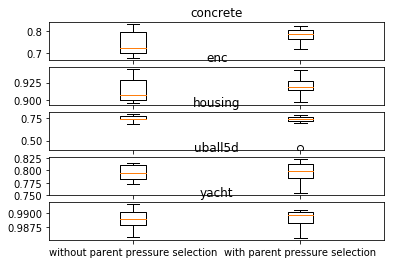

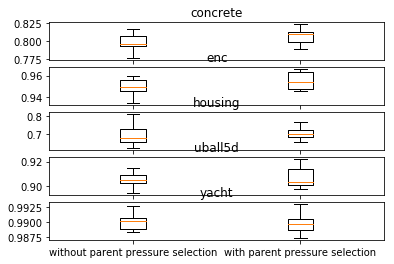

In [2]:
# define FEW configurations to compare

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline

# weight_parents=True added for comparison
estimators = {}
estimators['lasso'] = []
estimators['dt'] = []
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100))
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100, weight_parents=True))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100, weight_parents=True))
problems = ['concrete','enc','housing','uball5d','yacht']
# problems = ['enc','housing']
###################################################################################################### lasso
print('--- lasso ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['lasso'],X,y)
    # plot results
    ax[i].boxplot(list(scores))
    ax[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    # plot results
    ax2[i].boxplot(list(scores))
    ax2[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax2[i].set_title(p)

plt.show()